In [1]:
!pip install numpy==1.26.4
import matplotlib.pyplot as plt
import tensorflow as tf
!pip install tensorflow tensorflow-datasets
!pip install --upgrade tensorflow-datasets


Defaulting to user installation because normal site-packages is not writeable


2025-04-10 17:22:23.976507: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-10 17:22:24.181815: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8473] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-10 17:22:24.231640: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1471] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-10 17:22:24.654276: I tensorflow/core/platform/cpu_feature_guard.cc:211] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import tensorflow_datasets as tfds

# Load the PlantVillage dataset
dataset, info = tfds.load('plant_village', with_info=True, as_supervised=True)
full_dataset = dataset['train']

# Split the dataset into training and testing datasets

# Load dataset metadata
full_dataset, info = tfds.load('plant_village',split='train', with_info=True,  as_supervised=True)

# Print all label names
label_names = info.features['label'].names
print("Available class labels:")
for i, name in enumerate(label_names):
    print(f"{i}: {name}")


Available class labels:
0: Apple___Apple_scab
1: Apple___Black_rot
2: Apple___Cedar_apple_rust
3: Apple___healthy
4: Blueberry___healthy
5: Cherry___healthy
6: Cherry___Powdery_mildew
7: Corn___Cercospora_leaf_spot Gray_leaf_spot
8: Corn___Common_rust
9: Corn___healthy
10: Corn___Northern_Leaf_Blight
11: Grape___Black_rot
12: Grape___Esca_(Black_Measles)
13: Grape___healthy
14: Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
15: Orange___Haunglongbing_(Citrus_greening)
16: Peach___Bacterial_spot
17: Peach___healthy
18: Pepper,_bell___Bacterial_spot
19: Pepper,_bell___healthy
20: Potato___Early_blight
21: Potato___healthy
22: Potato___Late_blight
23: Raspberry___healthy
24: Soybean___healthy
25: Squash___Powdery_mildew
26: Strawberry___healthy
27: Strawberry___Leaf_scorch
28: Tomato___Bacterial_spot
29: Tomato___Early_blight
30: Tomato___healthy
31: Tomato___Late_blight
32: Tomato___Leaf_Mold
33: Tomato___Septoria_leaf_spot
34: Tomato___Spider_mites Two-spotted_spider_mite
35: Tomato___Targe

2025-04-10 17:22:32.664579: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9776 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:60:00.0, compute capability: 7.5


In [ ]:
import tensorflow_datasets as tfds

# Load the PlantVillage dataset
dataset, info = tfds.load('plant_village', with_info=True, as_supervised=True)
full_dataset = dataset['train']

# Split the dataset into training and testing datasets

# Load dataset metadata
full_dataset, info = tfds.load('plant_village',split='train', with_info=True,  as_supervised=True)

# Print all label names
label_names = info.features['label'].names
print("Available class labels:")
for i, name in enumerate(label_names):
    print(f"{i}: {name}")

# Correct tomato class names from the dataset
tomato_classes = [
    'Tomato___Bacterial_spot',
    'Tomato___Early_blight',
    'Tomato___healthy',
    'Tomato___Late_blight',
    'Tomato___Leaf_Mold',
    'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite',
    'Tomato___Target_Spot',
    'Tomato___Tomato_mosaic_virus',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus'
]

# Get indices of tomato classes
tomato_label_indices = tf.constant([label_names.index(name) for name in tomato_classes],dtype=tf.int64)

# Filter the dataset
def filter_tomato(img, label):
    label = tf.cast(label, tf.int64)
    return tf.reduce_any(tf.equal(label, tomato_label_indices))

tomato_dataset = full_dataset.filter(filter_tomato)


In [4]:
import tensorflow as tf

# Initialize a set to store unique class labels
unique_classes = set()

# Iterate through the dataset and collect the unique class labels
for _, label in tomato_dataset:
    unique_classes.add(label.numpy())  # add the class label to the set

# Get the class labels as a list
unique_classes_list = sorted(list(unique_classes))

# Print out the unique class labels
print("Unique class labels in the tomato dataset:")
for label in unique_classes_list:
    print(label)

Unique class labels in the tomato dataset:
28
29
30
31
32
33
34
35
36
37


2025-04-10 17:23:01.583117: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [5]:
# List of class names based on tomato diseases
label_names = [
    'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy',
    'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot',
    'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus'
]
unique_classes_list = sorted(set([label.numpy() for _, label in tomato_dataset]))
# Print the human-readable class names based on numeric indices
print("Class names present in the tomato dataset:")
for index in unique_classes_list:
    print(label_names[index - 28])

Class names present in the tomato dataset:
Tomato___Bacterial_spot
Tomato___Early_blight
Tomato___healthy
Tomato___Late_blight
Tomato___Leaf_Mold
Tomato___Septoria_leaf_spot
Tomato___Spider_mites Two-spotted_spider_mite
Tomato___Target_Spot
Tomato___Tomato_mosaic_virus
Tomato___Tomato_Yellow_Leaf_Curl_Virus


2025-04-10 17:23:30.107626: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [6]:
label_names = [
    'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy',
    'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot',
    'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus'
]

# Iterate through the dataset and print out numeric label, class name, and image shape
for image, label in tomato_dataset.take(10):  # Take 5 samples for preview
    numeric_label = label.numpy()  # Numeric label from dataset
    class_name = label_names[numeric_label - 28]  # Adjust index for base value of 28
    print(f"Numeric Label: {numeric_label}")
    print(f"Class Label: {class_name}")
    print(f"Image Shape: {image.shape}\n")

Numeric Label: 35
Class Label: Tomato___Target_Spot
Image Shape: (256, 256, 3)

Numeric Label: 31
Class Label: Tomato___Late_blight
Image Shape: (256, 256, 3)

Numeric Label: 34
Class Label: Tomato___Spider_mites Two-spotted_spider_mite
Image Shape: (256, 256, 3)

Numeric Label: 28
Class Label: Tomato___Bacterial_spot
Image Shape: (256, 256, 3)

Numeric Label: 31
Class Label: Tomato___Late_blight
Image Shape: (256, 256, 3)

Numeric Label: 30
Class Label: Tomato___healthy
Image Shape: (256, 256, 3)

Numeric Label: 34
Class Label: Tomato___Spider_mites Two-spotted_spider_mite
Image Shape: (256, 256, 3)

Numeric Label: 36
Class Label: Tomato___Tomato_mosaic_virus
Image Shape: (256, 256, 3)

Numeric Label: 37
Class Label: Tomato___Tomato_Yellow_Leaf_Curl_Virus
Image Shape: (256, 256, 3)

Numeric Label: 37
Class Label: Tomato___Tomato_Yellow_Leaf_Curl_Virus
Image Shape: (256, 256, 3)



In [7]:
# Get all numeric labels in the dataset
unique_labels = set()
for image, label in tomato_dataset:
    unique_labels.add(label.numpy())  # Add the numeric label to the set (set ensures uniqueness)

# Print unique labels
print(f"Unique numeric labels in the tomato dataset: {sorted(unique_labels)}")

# Also, print corresponding class names
print("\nClass names for the unique labels:")
for label in sorted(unique_labels):
    class_name = label_names[label - 28]  # Adjust for base index of 28
    print(f"Numeric Label: {label}, Class Label: {class_name}")

Unique numeric labels in the tomato dataset: [28, 29, 30, 31, 32, 33, 34, 35, 36, 37]

Class names for the unique labels:
Numeric Label: 28, Class Label: Tomato___Bacterial_spot
Numeric Label: 29, Class Label: Tomato___Early_blight
Numeric Label: 30, Class Label: Tomato___healthy
Numeric Label: 31, Class Label: Tomato___Late_blight
Numeric Label: 32, Class Label: Tomato___Leaf_Mold
Numeric Label: 33, Class Label: Tomato___Septoria_leaf_spot
Numeric Label: 34, Class Label: Tomato___Spider_mites Two-spotted_spider_mite
Numeric Label: 35, Class Label: Tomato___Target_Spot
Numeric Label: 36, Class Label: Tomato___Tomato_mosaic_virus
Numeric Label: 37, Class Label: Tomato___Tomato_Yellow_Leaf_Curl_Virus


2025-04-10 17:23:58.800486: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [8]:
import matplotlib.pyplot as plt
import tensorflow as tf
from collections import Counter

# Count the occurrences of each label in the dataset
class_counts = Counter()
for _, label in tomato_dataset:
    class_counts[label.numpy()] += 1

# List of class names based on tomato diseases
label_names = [
    'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy',
    'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot',
    'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus'
]

# Prepare data for plotting
labels = [label_names[i - 28] for i in class_counts.keys()]  # Adjust for the base index of 28
counts = [class_counts[i] for i in class_counts.keys()]

In [62]:
import random
min_tomato = min(class_counts.values())
min_tomato
labels_before = [label_names[i - 28] for i in class_counts.keys()]
counts_before = [class_counts[i] for i in class_counts.keys()]
class_samples = {i: [] for i in range(28, 38)}
for image, label in tfds.as_numpy(tomato_dataset):
    class_samples[label].append((image, label))
    
tomato_balanced = []
for label, samples in class_samples.items():
    tomato_balanced.extend(random.sample(samples, min_tomato))
    
random.shuffle(tomato_balanced)
images, labels = zip(*tomato_balanced)

new_class_counts = Counter(labels)
new_class_counts


Counter({32: 373,
         34: 373,
         28: 373,
         29: 373,
         30: 373,
         36: 373,
         33: 373,
         37: 373,
         35: 373,
         31: 373})

In [83]:
import tensorflow as tf
import numpy as np
from collections import defaultdict

def augment_image(image):
    """Function to augment a single image."""
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.resize_with_crop_or_pad(image, 256, 256)
    image = tf.image.random_crop(image, size=[200, 200, 3])
    image = tf.image.random_contrast(image, lower=0.4, upper=2.0)
    return image


def balance_classes(images, labels, target_size=700):
    """Ensure each class has exactly `target_size` images."""
    class_images = defaultdict(list)

    # Group images by label
    for img, label in zip(images, labels):
        class_images[int(label)].append(img)

    balanced_images = []
    balanced_labels = []

    for class_label, img_list in class_images.items():
        current_count = len(img_list)
        print(f"Class {class_label} starts with {current_count} images")

        if current_count < target_size:
            # Augment images to reach the target size
            augmented_images = []

            while len(augmented_images) < target_size:
                needed = target_size - len(augmented_images)
                to_augment = random.choices(img_list, k=needed)
                for img in to_augment:
                    img_tensor = tf.convert_to_tensor(img, dtype=tf.float32)
                    img_tensor = preprocess_image(img_tensor)  # resize to [256, 256]
                    aug_img = augment_image(img_tensor).numpy()
                    augmented_images.append(aug_img)

            balanced_images.extend(augmented_images)
            balanced_labels.extend([class_label] * target_size)

        elif current_count > target_size:
            # Downsample
            selected = random.sample(img_list, target_size)
            balanced_images.extend([preprocess_image(tf.convert_to_tensor(img)).numpy() for img in selected])
            balanced_labels.extend([class_label] * target_size)

        else:
            # Use as is
            balanced_images.extend([preprocess_image(tf.convert_to_tensor(img)).numpy() for img in img_list])
            balanced_labels.extend([class_label] * target_size)
    

    return balanced_images, balanced_labels

In [80]:
from collections import Counter

class_counts = Counter(balanced_labels)

for class_id in sorted(class_counts):
    print(f"Class {class_id}: {class_counts[class_id]} images")

Class 28: 700 images
Class 29: 700 images
Class 30: 700 images
Class 31: 700 images
Class 32: 700 images
Class 33: 700 images
Class 34: 700 images
Class 35: 700 images
Class 36: 327 images
Class 37: 700 images


In [82]:
original_class_36 = [img for img, label in zip(images, labels) if label == 36]
print(f"Original Class 36 count: {len(original_class_36)}")

Original Class 36 count: 373


In [86]:
import tensorflow as tf
import numpy as np
from collections import defaultdict
import random

def preprocess_image(image):
    """Resizes image to [256, 256] for consistent shape."""
    return tf.image.resize(image, [256, 256])

def augment_image(image):
    """Applies random augmentations, returns [200, 200, 3] image."""
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.resize_with_crop_or_pad(image, 256, 256)
    image = tf.image.random_crop(image, size=[200, 200, 3])
    image = tf.image.random_contrast(image, lower=0.4, upper=2.0)
    return image

def balance_classes(images, labels, target_size=700):
    class_images = defaultdict(list)

    # Group by label
    for img, label in zip(images, labels):
        class_images[int(label)].append(img)

    balanced_images = []
    balanced_labels = []

    for class_label, img_list in class_images.items():
        print(f"\nProcessing class {class_label} with {len(img_list)} original images")

        current_count = len(img_list)
        processed = []

        # Preprocess all images first to avoid shape issues later
        for img in img_list:
            try:
                img_tensor = tf.convert_to_tensor(img, dtype=tf.float32)
                img_tensor = preprocess_image(img_tensor)
                processed.append(img_tensor.numpy())
            except Exception as e:
                print(f"Skipping image due to preprocessing error: {e}")

        if len(processed) == 0:
            print(f"Class {class_label} has no usable images. Skipping.")
            continue

        if current_count < target_size:
            # Augment until reaching target_size
            augmented = []
            while len(augmented) < target_size:
                needed = target_size - len(augmented)
                to_augment = random.choices(processed, k=needed)
                for img in to_augment:
                    try:
                        img_tensor = tf.convert_to_tensor(img, dtype=tf.float32)
                        aug_img = augment_image(img_tensor).numpy()
                        augmented.append(aug_img)
                    except Exception as e:
                        print(f"Augmentation error in class {class_label}: {e}")

                    if len(augmented) >= target_size:
                        break

            balanced_images.extend(augmented)
            balanced_labels.extend([class_label] * target_size)
            print(f"Class {class_label} balanced to {len(augmented)} images")

        elif current_count > target_size:
            # Downsample
            selected = random.sample(processed, target_size)
            balanced_images.extend(selected)
            balanced_labels.extend([class_label] * target_size)
            print(f"Class {class_label} downsampled to {target_size} images")

        else:
            # Already the right size
            balanced_images.extend(processed)
            balanced_labels.extend([class_label] * target_size)
            print(f"Class {class_label} used as is with {target_size} images")

    return balanced_images, balanced_labels

In [88]:
from collections import Counter

class_counts = Counter(balanced_labels)
for class_id in sorted(class_counts):
    print(f"Class {class_id}: {class_counts[class_id]} images")

Class 28: 700 images
Class 29: 700 images
Class 30: 700 images
Class 31: 700 images
Class 32: 700 images
Class 33: 700 images
Class 34: 700 images
Class 35: 700 images
Class 36: 327 images
Class 37: 700 images


In [91]:
valid_class_36 = 0

for img, label in zip(images, labels):
    if label == 36:
        try:
            img_tensor = tf.convert_to_tensor(img, dtype=tf.float32)
            _ = preprocess_image(img_tensor)  # Resize test
            valid_class_36 += 1
        except Exception as e:
            print(f"Invalid image in class 36: {e}")

print(f"Class 36 has {valid_class_36} valid images")

Class 36 has 373 valid images


In [94]:
import tensorflow as tf
import numpy as np
from collections import defaultdict
import random

def preprocess_image(image):
    """Resizes image to [256, 256] for consistent shape."""
    return tf.image.resize(image, [256, 256])

def augment_image(image):
    """Applies random augmentations, returns [200, 200, 3] image."""
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.resize_with_crop_or_pad(image, 256, 256)
    image = tf.image.random_crop(image, size=[200, 200, 3])
    image = tf.image.random_contrast(image, lower=0.4, upper=2.0)
    return image

def balance_classes(images, labels, target_size=700):
    class_images = defaultdict(list)

    # Group images by label
    for img, label in zip(images, labels):
        class_images[int(label)].append(img)

    balanced_images = []
    balanced_labels = []

    for class_label, img_list in class_images.items():
        print(f"\nProcessing class {class_label} with {len(img_list)} original images")

        # Step 1: Preprocess all valid images
        processed = []
        for img in img_list:
            try:
                img_tensor = tf.convert_to_tensor(img, dtype=tf.float32)
                img_tensor = preprocess_image(img_tensor)
                processed.append(img_tensor.numpy())
            except Exception as e:
                print(f"Skipping bad image in class {class_label}: {e}")

        if len(processed) == 0:
            print(f"No valid images found for class {class_label}. Skipping...")
            continue

        # Step 2: Handle class balancing
        if len(processed) < target_size:
            print(f"Only {len(processed)} valid images in class {class_label}. Augmenting to {target_size}...")

            augmented = []

            # Augment until target_size is reached
            while len(augmented) < target_size:
                img = random.choice(processed)
                try:
                    aug_img = augment_image(tf.convert_to_tensor(img)).numpy()
                    augmented.append(aug_img)
                except Exception as e:
                    print(f"Augmentation error: {e}")
                    continue

            balanced_images.extend(augmented)
            balanced_labels.extend([class_label] * target_size)
            print(f"Class {class_label} balanced to {target_size} images")

        elif len(processed) > target_size:
            # Downsample
            selected = random.sample(processed, target_size)
            balanced_images.extend(selected)
            balanced_labels.extend([class_label] * target_size)
            print(f"Class {class_label} downsampled to {target_size} images")

        else:
            # Exact match
            balanced_images.extend(processed)
            balanced_labels.extend([class_label] * target_size)
            print(f"Class {class_label} already balanced")

    return balanced_images, balanced_labels

In [95]:
from collections import Counter

class_counts = Counter(balanced_labels)
for class_id in sorted(class_counts):
    print(f"Class {class_id}: {class_counts[class_id]} images")

Class 28: 700 images
Class 29: 700 images
Class 30: 700 images
Class 31: 700 images
Class 32: 700 images
Class 33: 700 images
Class 34: 700 images
Class 35: 700 images
Class 36: 327 images
Class 37: 700 images


In [129]:
valid_class_36 = []

for img, label in zip(images, labels):
    if label == 36:
        try:
            img_tensor = tf.convert_to_tensor(img, dtype=tf.float32)
            resized = preprocess_image(img_tensor)
            valid_class_36.append(resized)
        except Exception as e:
            print(f"Preprocessing failed: {e}")

print(f"Class 36 usable images: {len(valid_class_36)}")

Class 36 usable images: 0


In [99]:
import random
import tensorflow as tf
from collections import defaultdict

def augment_image(image):
    """Function to augment a single image."""
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.resize_with_crop_or_pad(image, 256, 256)
    image = tf.image.random_crop(image, size=[200, 200, 3])
    image = tf.image.random_contrast(image, lower=0.4, upper=2.0)
    return image

def preprocess_image(image):
    """Preprocessing function to resize image."""
    # Resize image to [256, 256, 3] before augmentation
    return tf.image.resize(image, [256, 256])

def balance_classes(images, labels, target_size=700):
    """Ensure each class has exactly `target_size` images."""
    class_images = defaultdict(list)

    # Group images by label
    for img, label in zip(images, labels):
        class_images[int(label)].append(img)

    balanced_images = []
    balanced_labels = []

    for class_label, img_list in class_images.items():
        current_count = len(img_list)
        print(f"Class {class_label} starts with {current_count} images")

        if current_count < target_size:
            # Augment images to reach the target size
            augmented_images = []

            while len(augmented_images) < target_size:
                needed = target_size - len(augmented_images)
                to_augment = random.choices(img_list, k=needed)

                for img in to_augment:
                    img_tensor = tf.convert_to_tensor(img, dtype=tf.float32)
                    img_tensor = preprocess_image(img_tensor)  # resize to [256, 256]
                    try:
                        aug_img = augment_image(img_tensor).numpy()
                        augmented_images.append(aug_img)
                    except Exception as e:
                        print(f"Augmentation error: {e}")
                        continue

            balanced_images.extend(augmented_images)
            balanced_labels.extend([class_label] * target_size)

        elif current_count > target_size:
            # Downsample to target size
            selected = random.sample(img_list, target_size)
            balanced_images.extend([preprocess_image(tf.convert_to_tensor(img)).numpy() for img in selected])
            balanced_labels.extend([class_label] * target_size)

        else:
            # Use as is
            balanced_images.extend([preprocess_image(tf.convert_to_tensor(img)).numpy() for img in img_list])
            balanced_labels.extend([class_label] * target_size)
    
    return balanced_images, balanced_labels

In [101]:
from collections import Counter

# After calling balance_classes function
balanced_images, balanced_labels = balance_classes(images, labels, target_size=700)

# Use Counter to count the occurrences of each class in balanced_labels
class_counts = Counter(balanced_labels)

# Print class count
for class_id, count in sorted(class_counts.items()):
    print(f"Class {class_id}: {count} images")

Class 32 starts with 373 images
Class 34 starts with 373 images
Class 28 starts with 373 images
Class 29 starts with 373 images
Class 30 starts with 373 images
Class 36 starts with 373 images
Class 33 starts with 373 images
Class 37 starts with 373 images
Class 35 starts with 373 images
Class 31 starts with 373 images
Class 28: 700 images
Class 29: 700 images
Class 30: 700 images
Class 31: 700 images
Class 32: 700 images
Class 33: 700 images
Class 34: 700 images
Class 35: 700 images
Class 36: 700 images
Class 37: 700 images


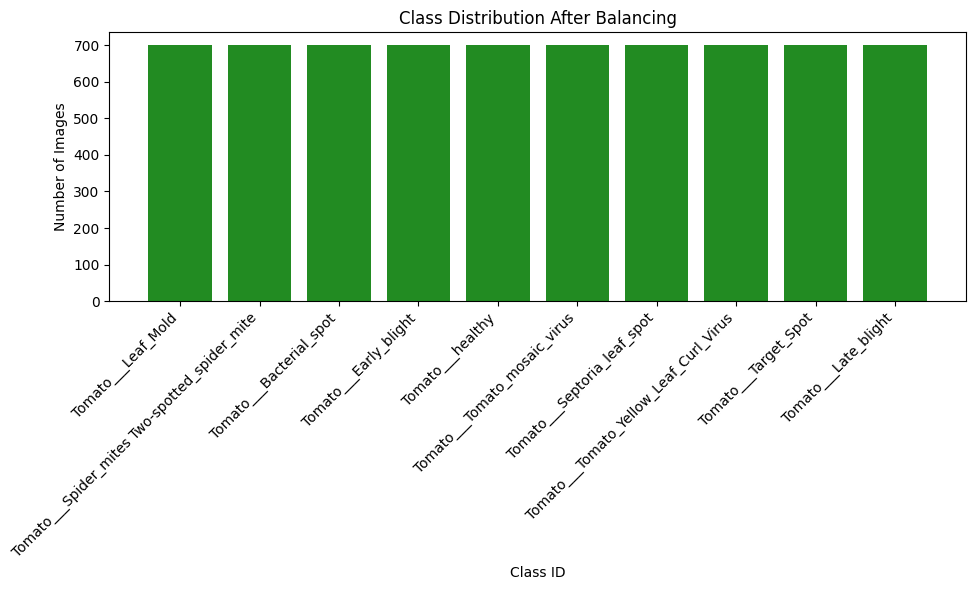

In [128]:
import matplotlib.pyplot as plt
from collections import Counter

# Assuming you already have balanced_labels from the balance_classes function
# balanced_labels contains the class labels after balancing

# Use Counter to count the occurrences of each class in balanced_labels
class_counts = Counter(balanced_labels)

# Prepare data for plotting
classes = list(class_counts.keys())  # List of class IDs
counts = list(class_counts.values())  # Corresponding counts of each class

# List of class names based on tomato diseases
label_names = [
    'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy',
    'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot',
    'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus'
]

# Prepare data for plotting
labels = [label_names[i - 28] for i in class_counts.keys()]  # Adjust for the base index of 28
counts = [class_counts[i] for i in class_counts.keys()]

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color='forestgreen')

# Add labels and title
plt.xlabel('Class ID')
plt.ylabel('Number of Images')
plt.title('Class Distribution After Balancing')

# Show the plot
plt.xticks(labels,rotation=45, ha='right')  
plt.tight_layout()  
plt.show()


KeyError: 35

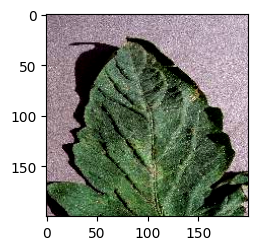

Unique labels: {32, 33, 34, 35, 36, 37, 28, 29, 30, 31}


KeyError: 31

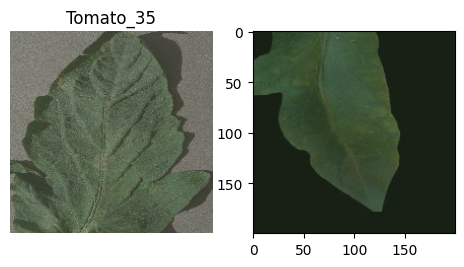

In [107]:
# Check the range of unique labels in your dataset
unique_labels = set()
for image, label in dataset:
    unique_labels.add(label.numpy())  # Add unique label IDs

print("Unique labels:", unique_labels)

# Then, update the label_names dictionary to include all classes
# This is just an example, replace the values with actual class names
label_names = {0: 'Tomato_1', 1: 'Tomato_2', 2: 'Tomato_3', 3: 'Tomato_4', 4: 'Tomato_5', 35: 'Tomato_35'}

# Call the function again with the updated label_names
show_sample_images(dataset, label_names, num=8)

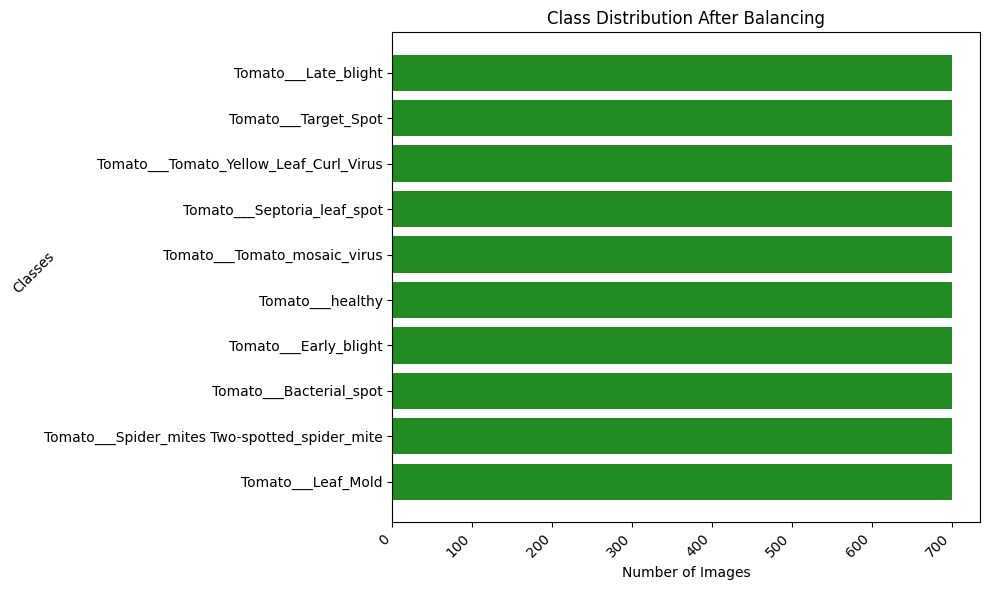

In [126]:
import matplotlib.pyplot as plt

# Assuming 'class_counts' is your dictionary with class labels and counts
class_counts = {
    'Tomato___Leaf_Mold': 700,
    'Tomato___Spider_mites Two-spotted_spider_mite': 700,
    'Tomato___Bacterial_spot': 700,
    'Tomato___Early_blight': 700,
    'Tomato___healthy': 700,
    'Tomato___Tomato_mosaic_virus': 700,
    'Tomato___Septoria_leaf_spot': 700,
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 700,
    'Tomato___Target_Spot': 700,
    'Tomato___Late_blight': 700
}

# Plotting a horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Create horizontal bars
ax.barh(list(class_counts.keys()), list(class_counts.values()), color='forestgreen')

# Add labels and title
ax.set_xlabel('Number of Images')
ax.set_ylabel('Classes',rotation=45 )
ax.set_title('Class Distribution After Balancing')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout so labels don't overlap
plt.tight_layout()

# Show the plot
plt.show()